## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
file_name = 'train.csv'
train = pd.read_csv(file_name)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train.Pclass.unique()

array([3, 1, 2])

## 3. High Level Summary of Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## 4. High Level Analysis of Missing Values

In [24]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


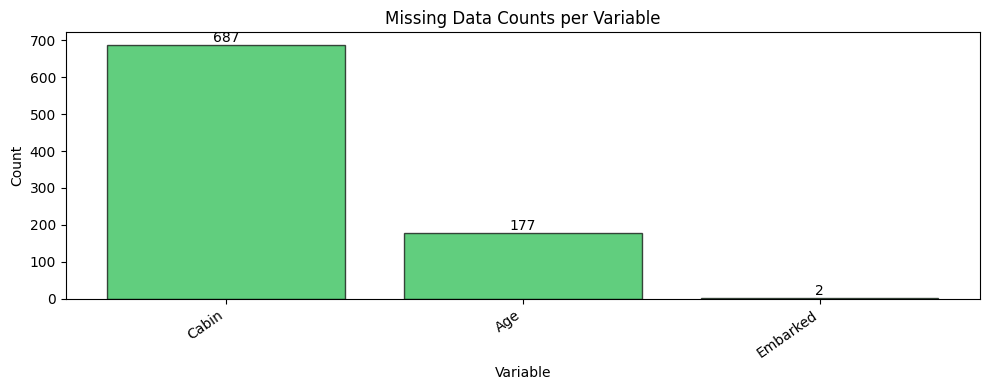

In [25]:
eda_helper_functions.plot_missing_info(train)

### Observations (Missing values)
- Age has ~20% missing; Embarked has 2 missing rows.
- Cabin initially has extensive missingness (handled later by binarizing).


## 5. High-level Analysis of Outliers

In [27]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [28]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns='Survived')
        .select_dtypes(include='number')
    ))
    .query('outlier == -1')
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,-1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,-1
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,-1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,-1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,-1


### Observations (Outlier scan - IsolationForest)
- Flags a small set of high-Fare and some Age extremes.
- Outliers are few and do not dominate the dataset.


## 6. Pair Plots

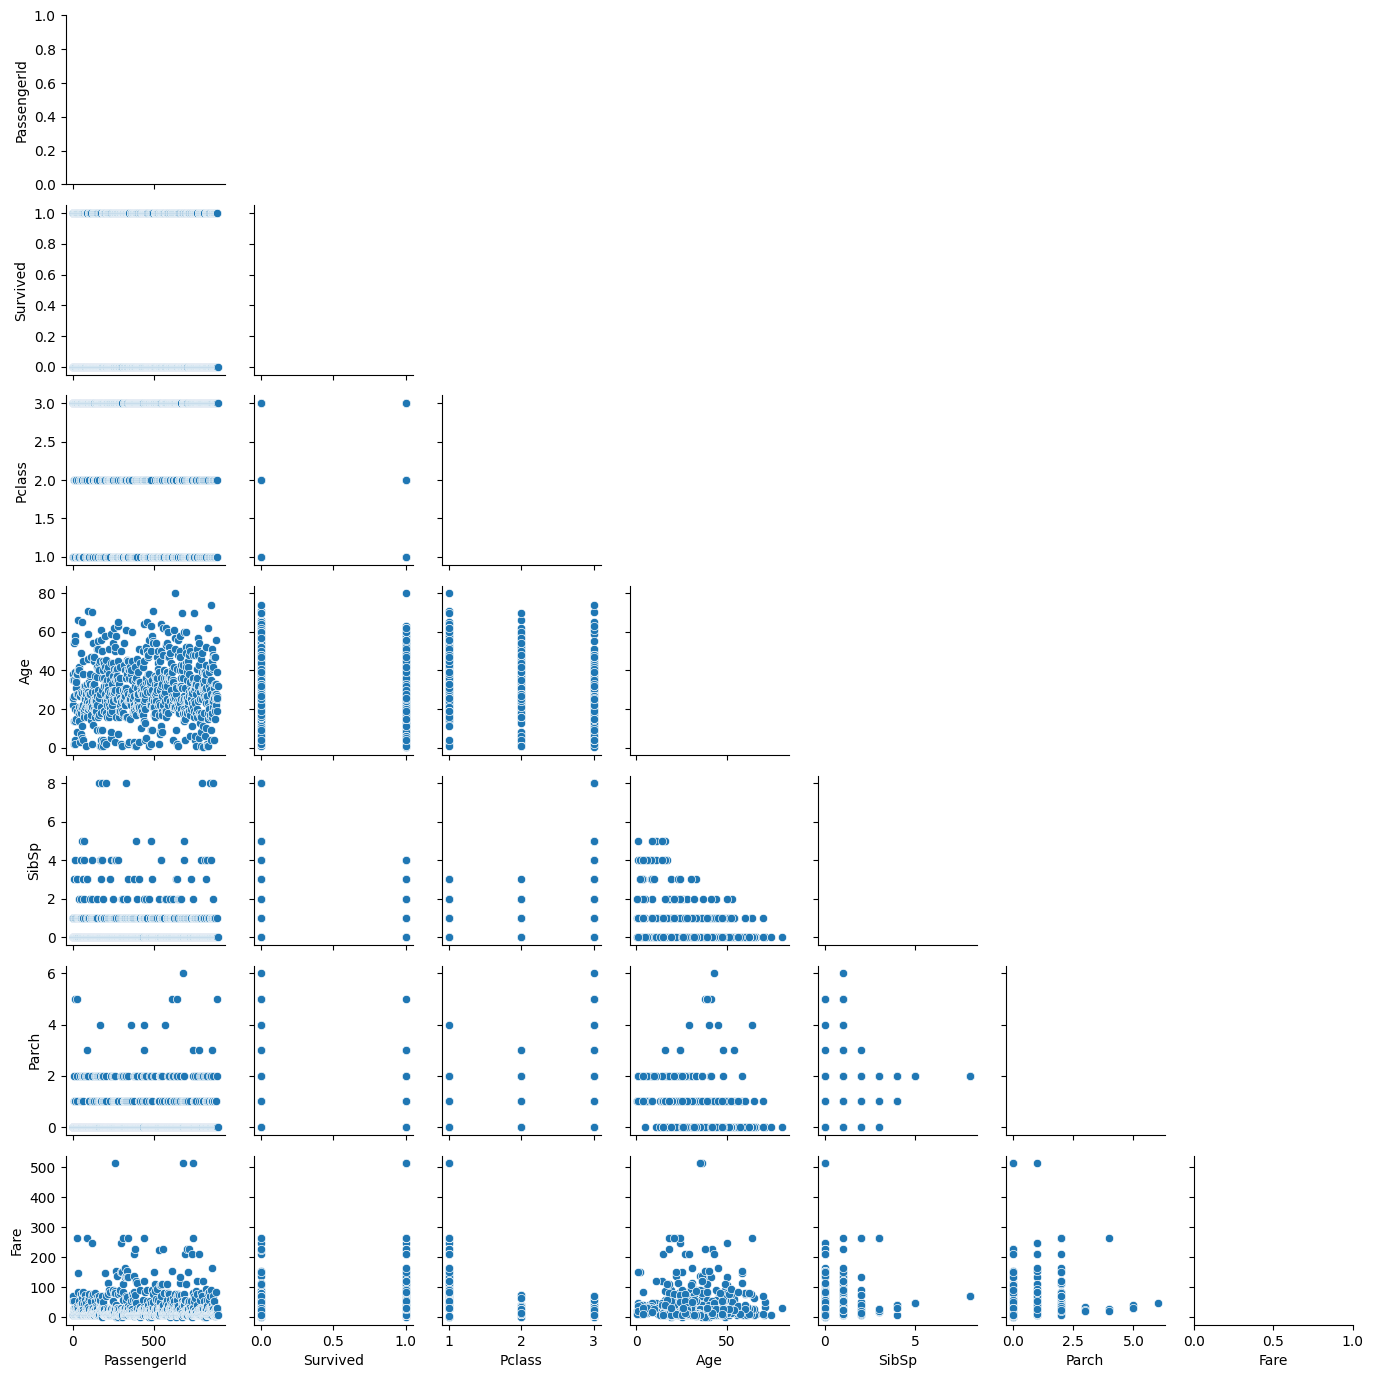

In [38]:
eda_helper_functions.pair_plots(train, height=2, aspect=1)

### Observations (Pair plots)
- Fare shows heavy right-skew and outliers.
- SibSp and Parch cluster at low counts; slight positive association between them.
- Little visible linear relation among other numeric pairs.


## 7. Correlation Analysis

In [5]:
train = (
    train
    .drop(columns=['PassengerId', 'Name'])
    .assign(
        Survived=lambda df_: (
            df_
            .Survived
            .map({
                0: 'No',
                1: 'Yes'
            })
            .astype('O')
        ),
        Pclass=lambda df_: (
            df_
            .Pclass
            .map({
                1: 'First',
                2: 'Second',
                3: 'Third'
            })
            .astype('O')
        )
    )
)

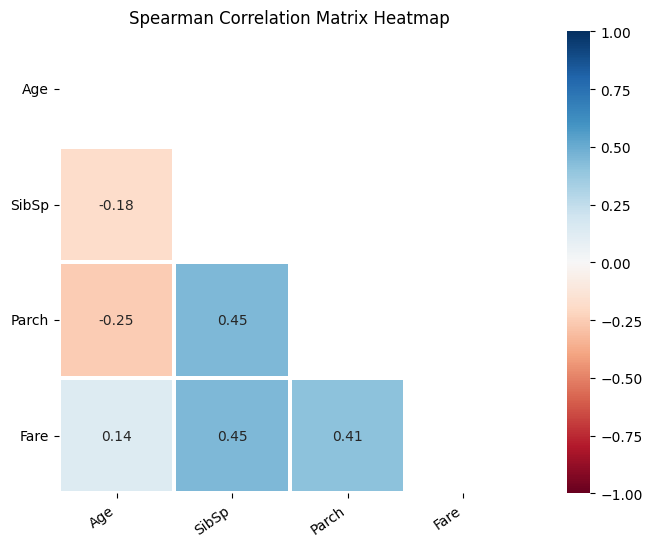

In [6]:
eda_helper_functions.correlation_heatmap(train)

### Observations (Correlation heatmap - numeric)
- Moderate positive correlation between SibSp and Parch.
- Weak correlations otherwise; Fare correlates weakly after Pclass is categorical.


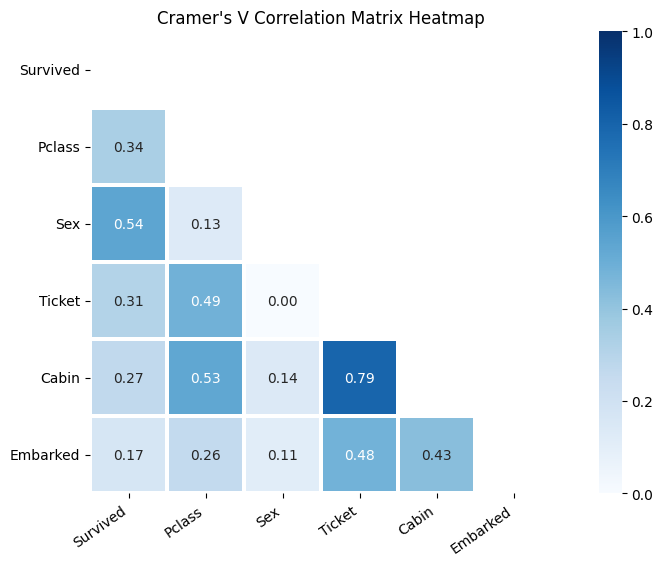

In [7]:
eda_helper_functions.cramersV_heatmap(train)

### Observations (Cramer's V heatmap)
- Strongest associations: Survived~Sex and Survived~Pclass.
- Moderate: Survived~Cabin-known; Embarked weaker; Ticket largely uninformative.


## 8. Detailed Analysis

In [83]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### `Pclass`

In [84]:
train.Pclass

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: Pclass, Length: 891, dtype: object

In [85]:
eda_helper_functions.cat_summary(train, 'Pclass')

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: Pclass, Length: 891, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 891 / 891 rows


,
count,891
unique,3
top,Third
freq,491


,count,percentage
category,,
Third,491,0.551066
First,216,0.242424
Second,184,0.206510


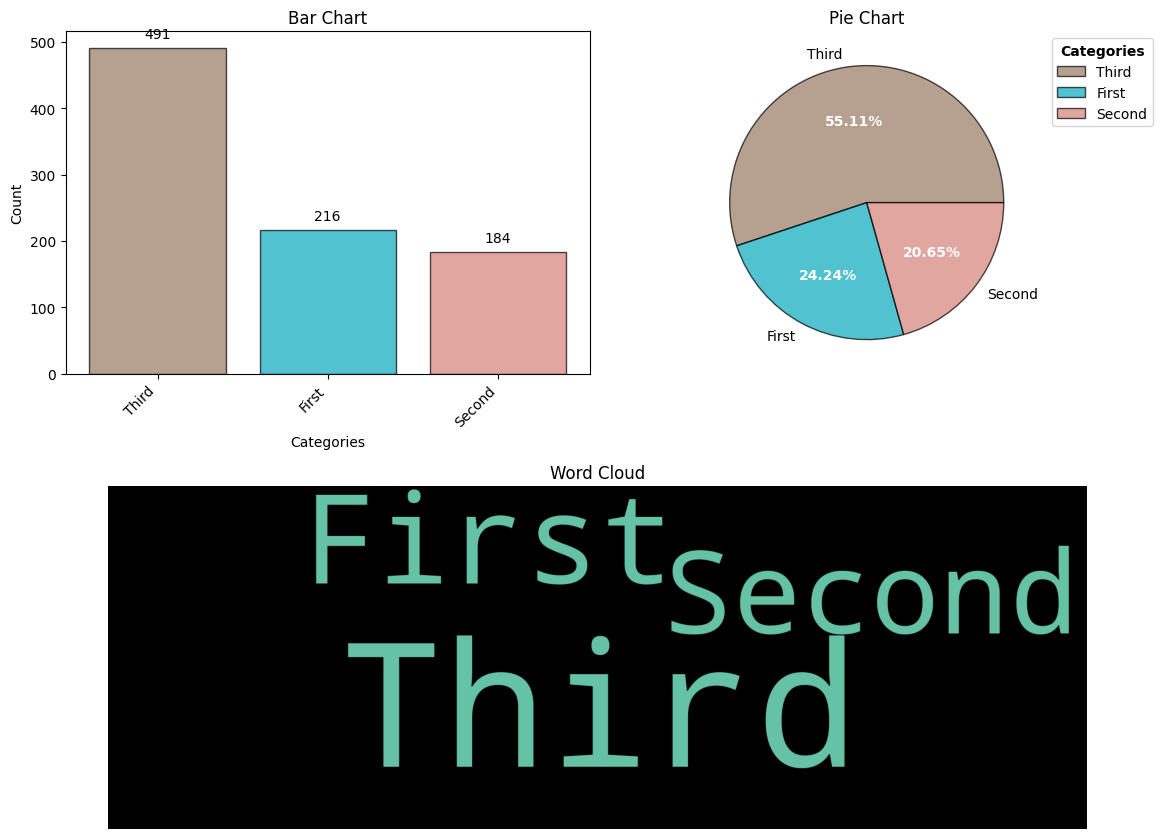

In [86]:
eda_helper_functions.cat_univar_plots(train, 'Pclass')

### Observations (Pclass univariate)
- Third class is the largest group; First class the smallest.
- Class composition underlies differences seen in survival and Fare.


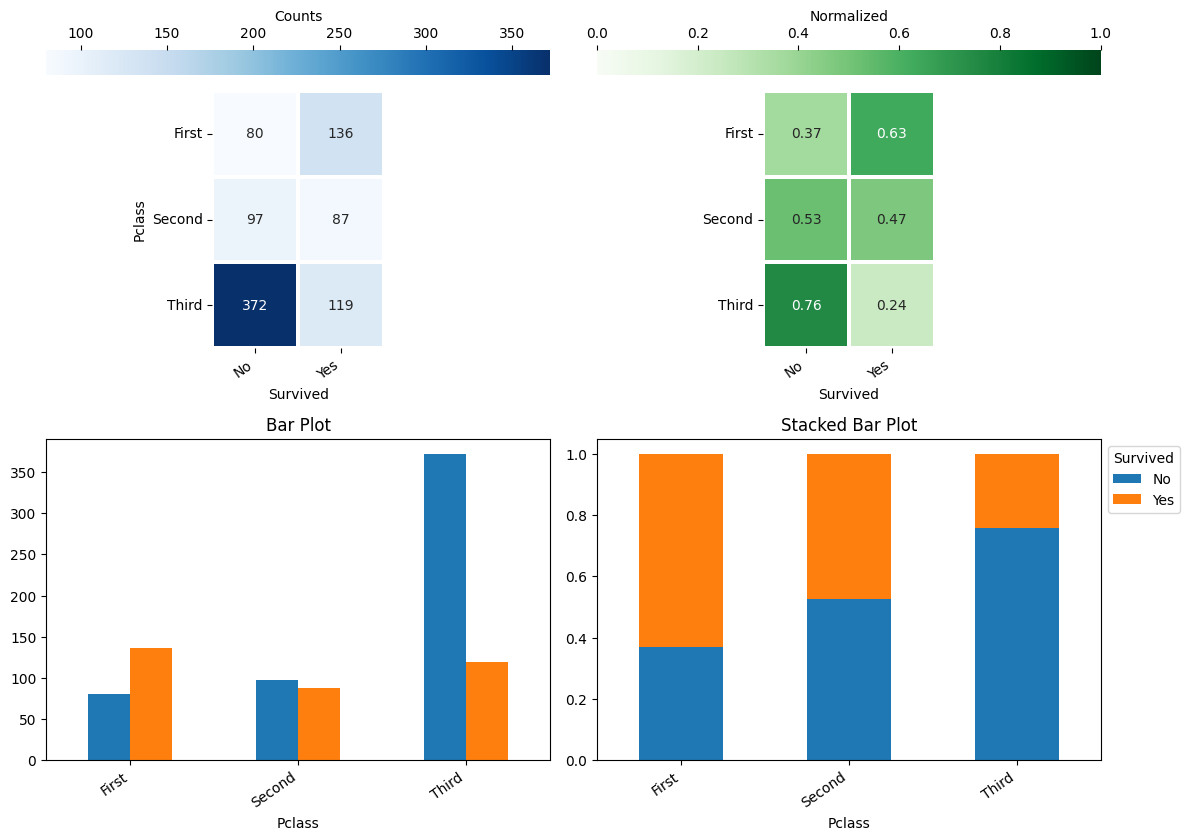

In [87]:
eda_helper_functions.cat_bivar_plots(train, 'Pclass', 'Survived')

### Observations (Pclass vs Survived)
- First-class survival is highest; Third-class is lowest.
- Pclass remains a strong predictor even after accounting for Sex.


In [8]:
def stacked_bar(data, category, target='Survived', **kwargs):
    # Create cross-tab for the given category vs target
    crosstab = pd.crosstab(data[category], data[target], normalize='index')
    bottoms = np.zeros(len(crosstab))
    
    for surv_status in sorted(crosstab.columns):
        plt.bar(
            crosstab.index,
            crosstab[surv_status],
            bottom=bottoms,
            label=f"{target}: {surv_status}"
        )
        bottoms += crosstab[surv_status]

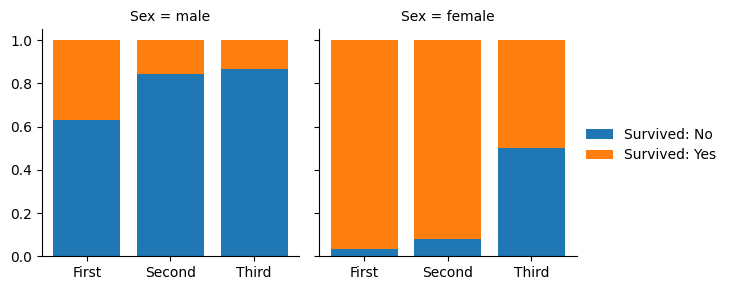

In [9]:
pclass_grid = sns.FacetGrid(
    data=train,
    col='Sex'
)
pclass_grid.map_dataframe(stacked_bar, category='Pclass')
pclass_grid.add_legend()

### Observations (Pclass × Sex stacked bars)
- Survival gradient: First > Second > Third in both sexes.
- Females have higher survival within each Pclass; Third-class females still lower than First/Second.


### `Sex`

In [89]:
train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [90]:
eda_helper_functions.cat_summary(train, 'Sex')

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 891 / 891 rows


,
count,891
unique,2
top,male
freq,577


,count,percentage
category,,
male,577,0.647587
female,314,0.352413


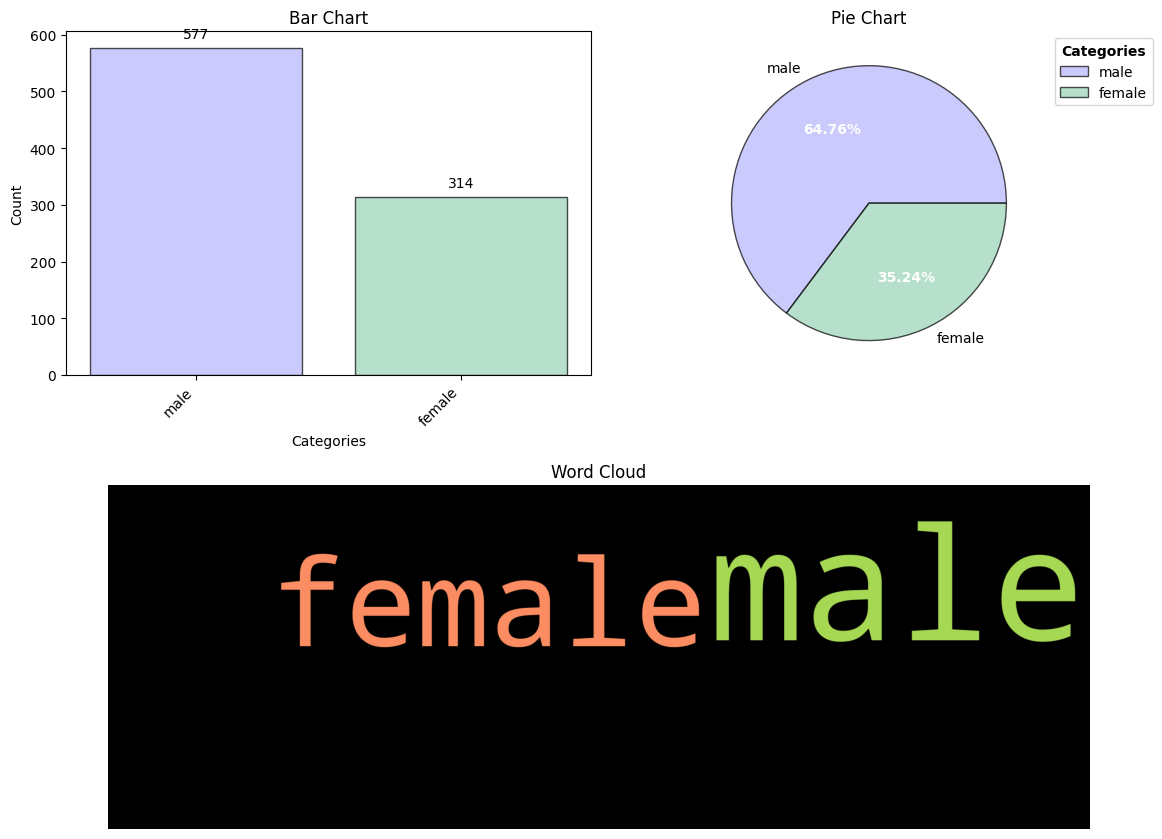

In [98]:
eda_helper_functions.cat_univar_plots(train, 'Sex')

### Observations (Sex univariate)
- Dataset skews male.
- Class composition differs by Sex, contributing to survival differences.


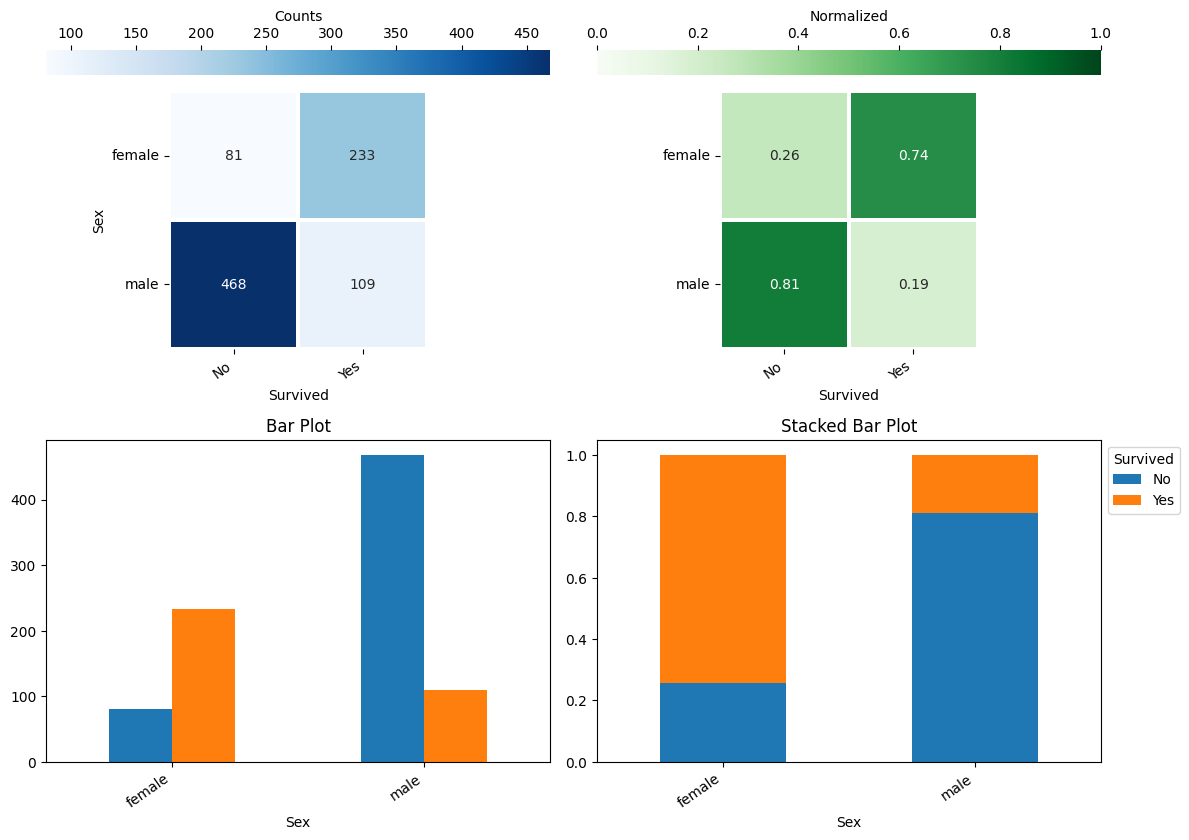

In [99]:
eda_helper_functions.cat_bivar_plots(train, 'Sex', 'Survived')

### Observations (Sex vs Survived)
- Female survival is markedly higher than male.
- This is the strongest single-variable association with survival.


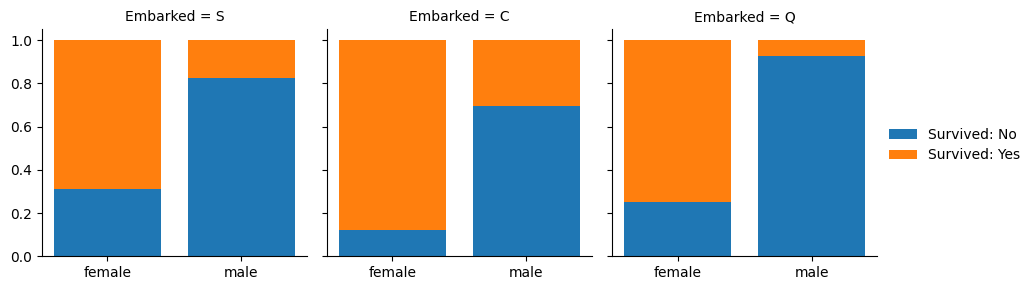

In [10]:
pclass_grid = sns.FacetGrid(
    data=train,
    col='Embarked'
)
pclass_grid.map_dataframe(stacked_bar, category='Sex')
pclass_grid.add_legend()

### Observations (Sex × Embarked stacked bars)
- Female survival rate is higher than male across ports.
- Port differences persist but are secondary to sex.


### `Age`

In [131]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [132]:
eda_helper_functions.num_summary(train, 'Age')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Data Type      : float64
Missing Data   : 177 rows (19.87 %)
Available Data : 714 / 891 rows


,value
percentile,
0,0.420
5,4.000
10,14.000
25,20.125
50,28.000
75,38.000
90,50.000
95,56.000
99,65.870


,value
mean,29.699118
trimmed mean (5%),NaN
trimmed mean (10%),NaN
median,28.000000


,value
var,211.019125
std,14.526497
IQR,17.875000
mad,9.000000
coef_variance,0.489122


,value
skewness,0.389108
kurtosis,0.178274


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.337348958673592e-08
Test Statistic       : 0.9814577414504954
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.783
Test Statistic       : 3.8230373853616584
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [133]:
eda_helper_functions.num_cat_hyp_testing(train, 'Age', 'Survived')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 4.271194933815904
- p-value              : 0.03912465401348333
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Age and Survived are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1.970097978146391
- p-value              : 0.16043746252207006
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Age and Survived are not associated to each other


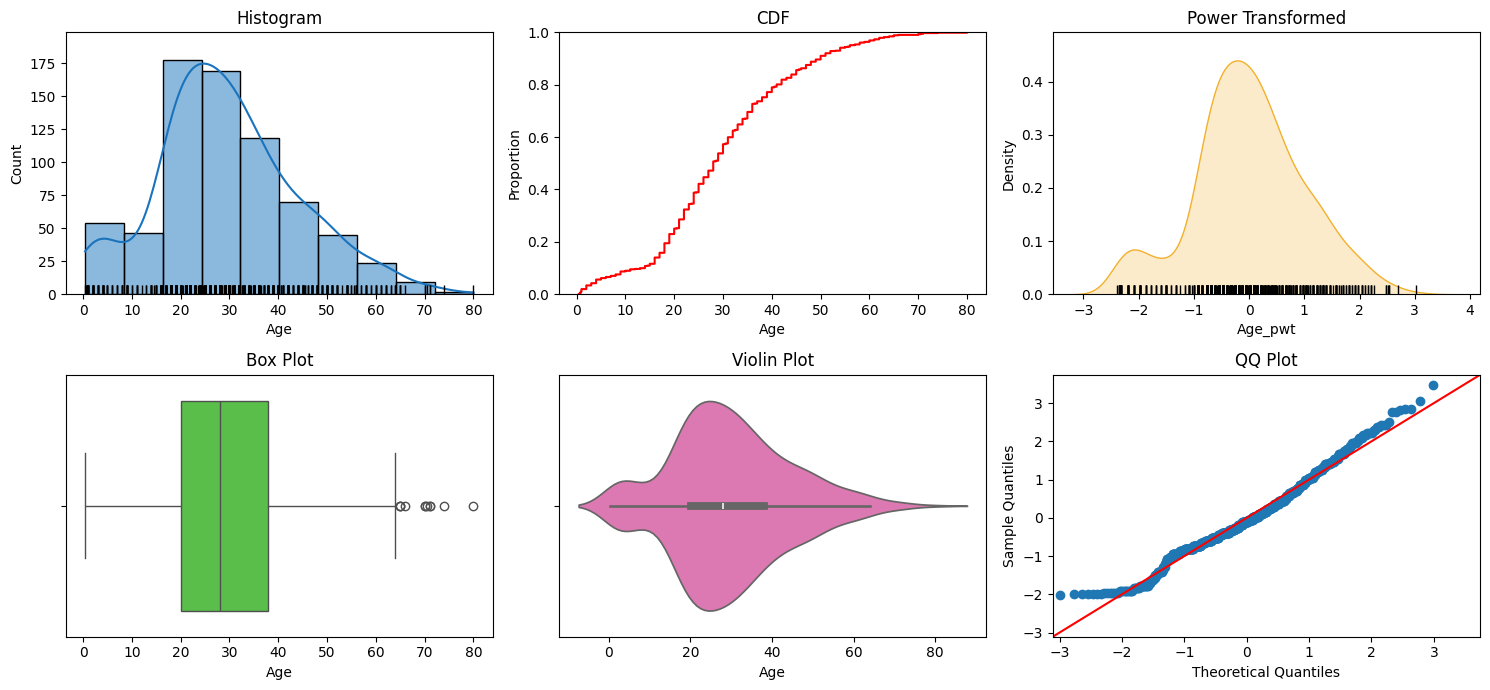

In [134]:
eda_helper_functions.num_univar_plots(train, 'Age')

### Observations (Age univariate)
- Ages cluster in 20–40 with tails into children and elderly.
- ~20% missing; non-normal per Shapiro and Anderson-Darling.


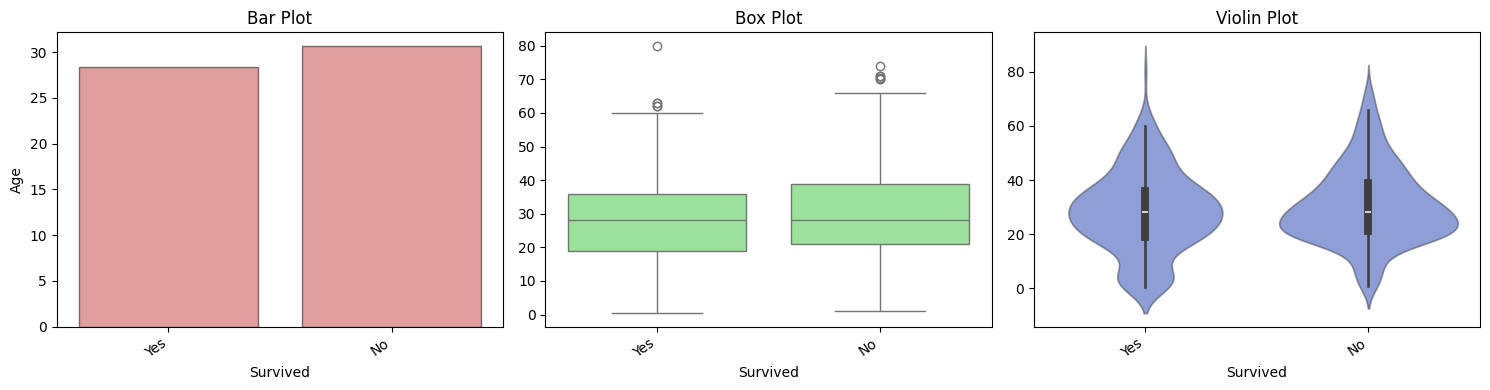

In [135]:
eda_helper_functions.num_cat_bivar_plots(train, 'Age', 'Survived')

### Observations (Age vs Survived)
- Mean age differs modestly between survival groups; medians overlap more.
- Effect varies by subgroup; overall association is weaker than Sex or Pclass.


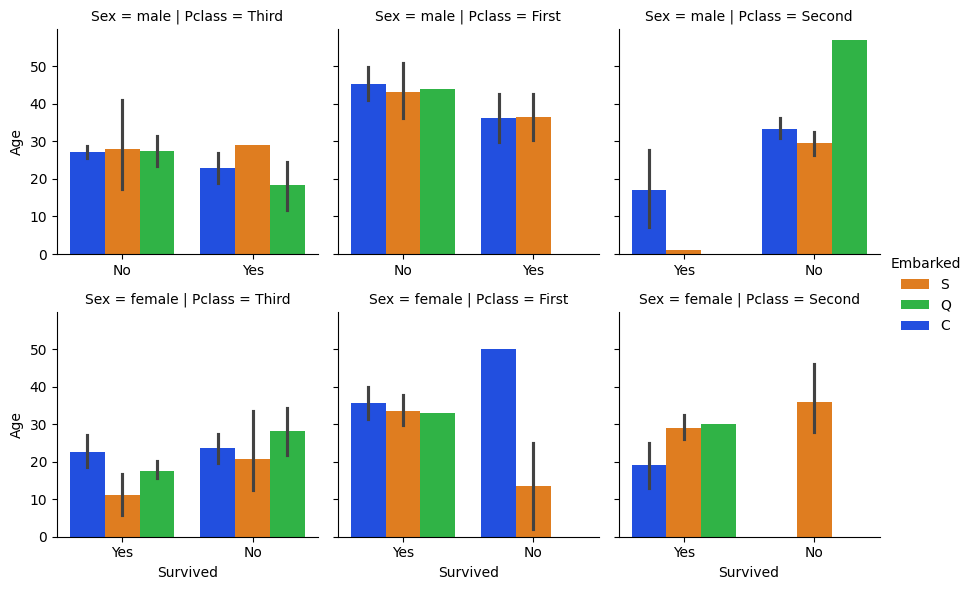

In [11]:
age_grid = sns.FacetGrid(
    data=train,
    row='Sex',
    col='Pclass',
    sharex=False
)
age_grid.map_dataframe(sns.barplot, x='Survived', y='Age', hue='Embarked', palette='bright')
age_grid.add_legend(title='Embarked')

### Observations (Age × Survived by Sex×Pclass, hue=Embarked)
- Third-class males: survivors skew younger; low survival overall.
- First-class females: high survival across ages; age differences are small.


### `SibSp` & `Parch`

In [157]:
train.SibSp

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [183]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [203]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [204]:
train[['SibSp', 'Parch']].sum(axis=1)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [12]:
train = (
    train
    .assign(
        family_size=lambda df_: np.select(
            [
                df_[['SibSp', 'Parch']].sum(axis=1).eq(0),
                df_[['SibSp', 'Parch']].sum(axis=1).between(1, 3, inclusive='left'),  
                df_[['SibSp', 'Parch']].sum(axis=1).ge(3)
            ],
            [
                'Solo',
                'Small Family',
                'Large Family'
            ],
            default='unknown'
        )
    )
)

In [13]:
eda_helper_functions.cat_summary(train, 'family_size')

0      Small Family
1      Small Family
2              Solo
3      Small Family
4              Solo
           ...     
886            Solo
887            Solo
888    Large Family
889            Solo
890            Solo
Name: family_size, Length: 891, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 891 / 891 rows


,
count,891
unique,3
top,Solo
freq,537


,count,percentage
category,,
Solo,537,0.602694
Small Family,263,0.295174
Large Family,91,0.102132


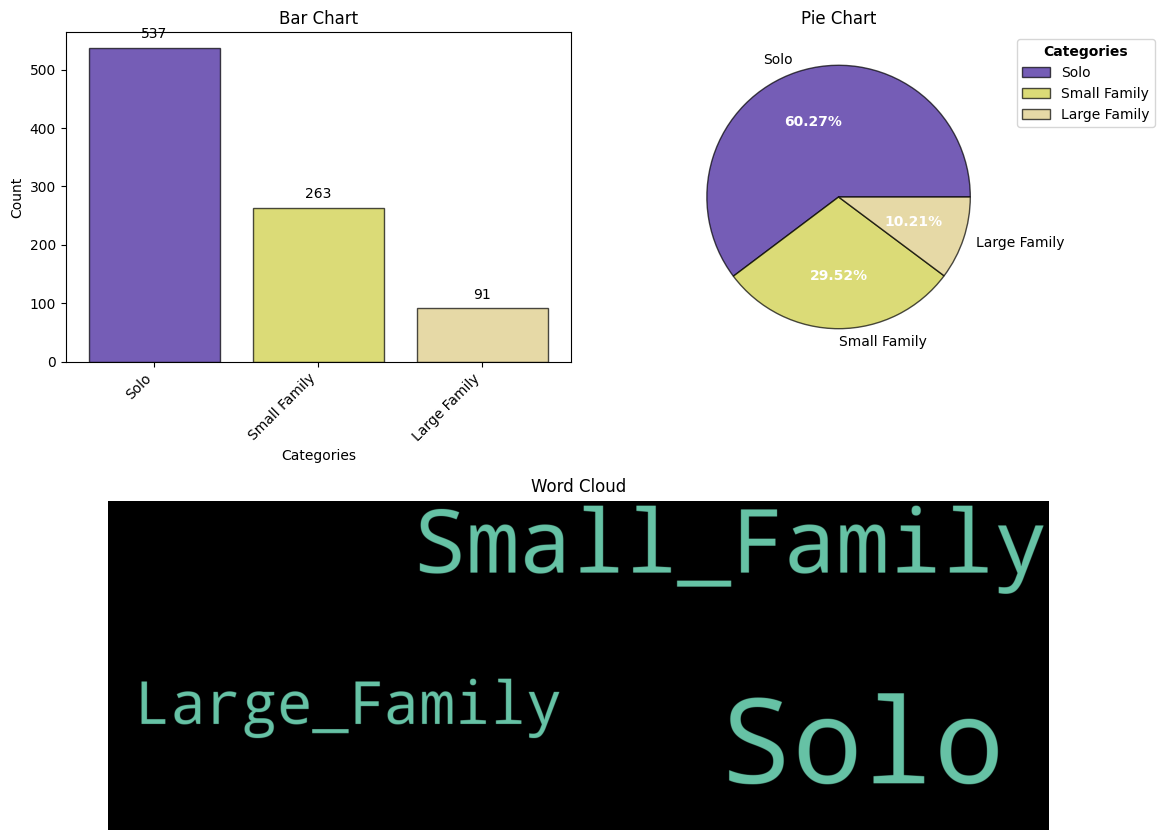

In [14]:
eda_helper_functions.cat_univar_plots(train, 'family_size')

### Observations (family_size univariate)
- Many solo travelers; fewer small families; few large families.
- Family-size categories are uneven, reflecting household travel patterns.


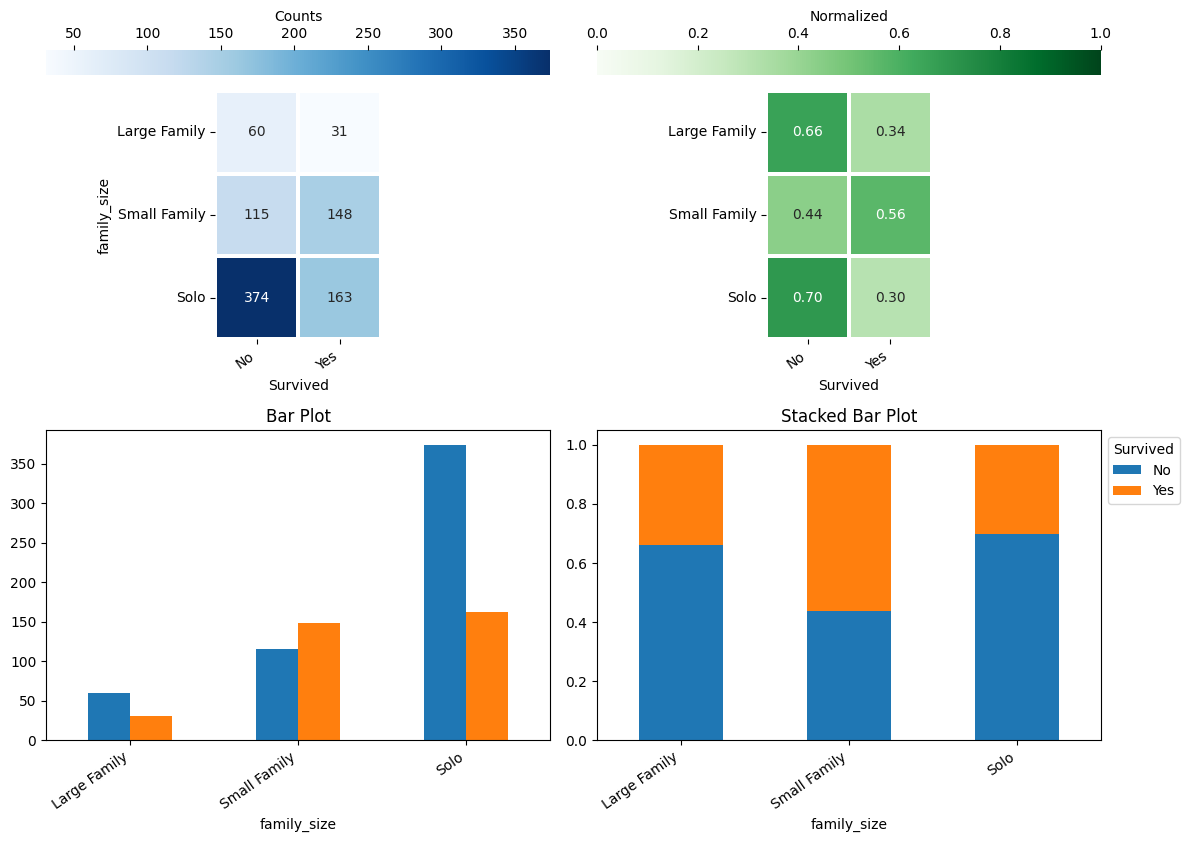

In [15]:
eda_helper_functions.cat_bivar_plots(train, 'family_size', 'Survived')

### Observations (family_size vs Survived)
- Small families have the highest survival; large families the lowest.
- Solo travelers fare in-between small and large families.


### `Ticket`

In [205]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [209]:
len(train.Ticket.unique())

681

### `Fare`

In [227]:
train.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [228]:
eda_helper_functions.num_summary(train, 'Fare')

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 891 / 891 rows


,value
percentile,
0,0.00000
5,7.22500
10,7.55000
25,7.91040
50,14.45420
75,31.00000
90,77.95830
95,112.07915
99,249.00622


,value
mean,32.204208
trimmed mean (5%),24.374729
trimmed mean (10%),21.378716
median,14.454200


,value
var,2469.436846
std,49.693429
IQR,23.089600
mad,6.904200
coef_variance,1.543073


,value
skewness,4.787317
kurtosis,33.398141


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.0840444395829658e-43
Test Statistic       : 0.5218913010396559
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.784
Test Statistic       : 122.16962721459208
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


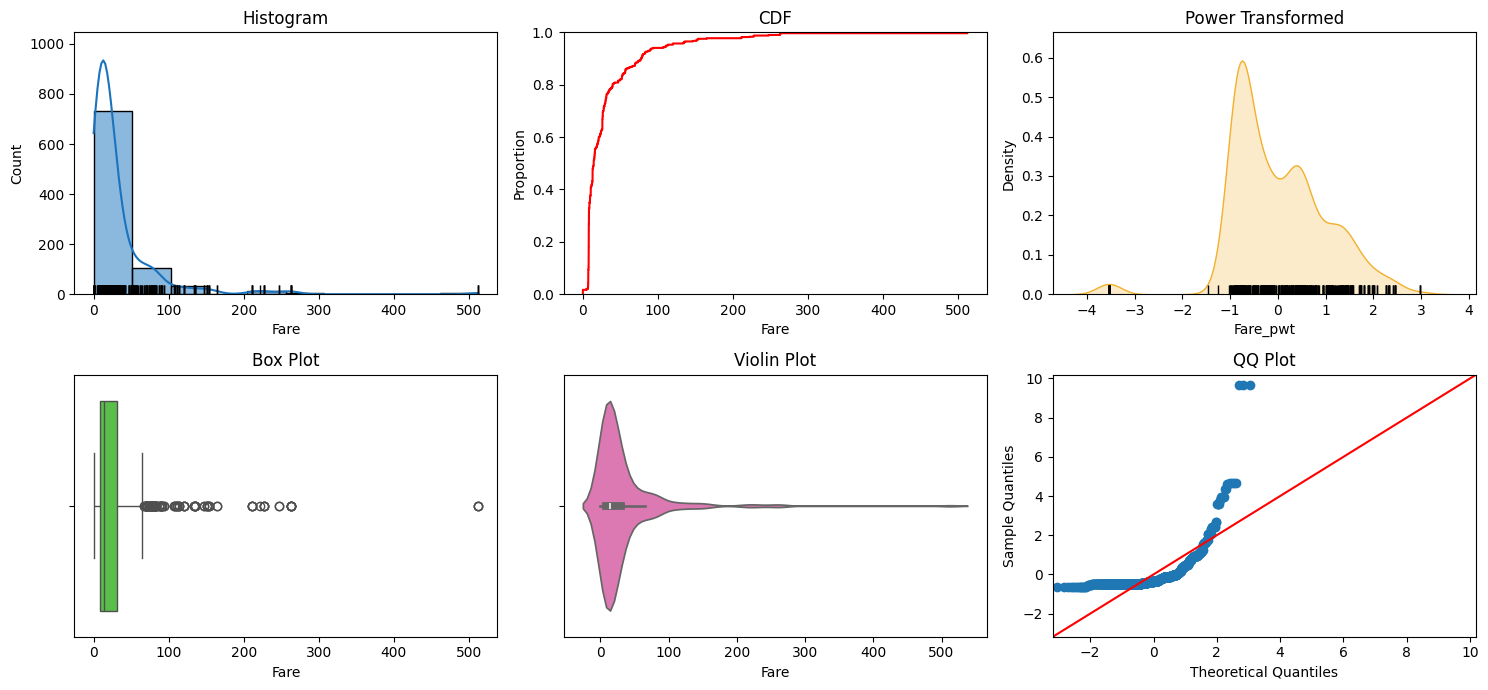

In [229]:
eda_helper_functions.num_univar_plots(train, 'Fare')

### Observations (Fare univariate)
- Strong right skew with many low fares and a long tail of high fares.
- Outliers present; non-normality confirmed by tests.


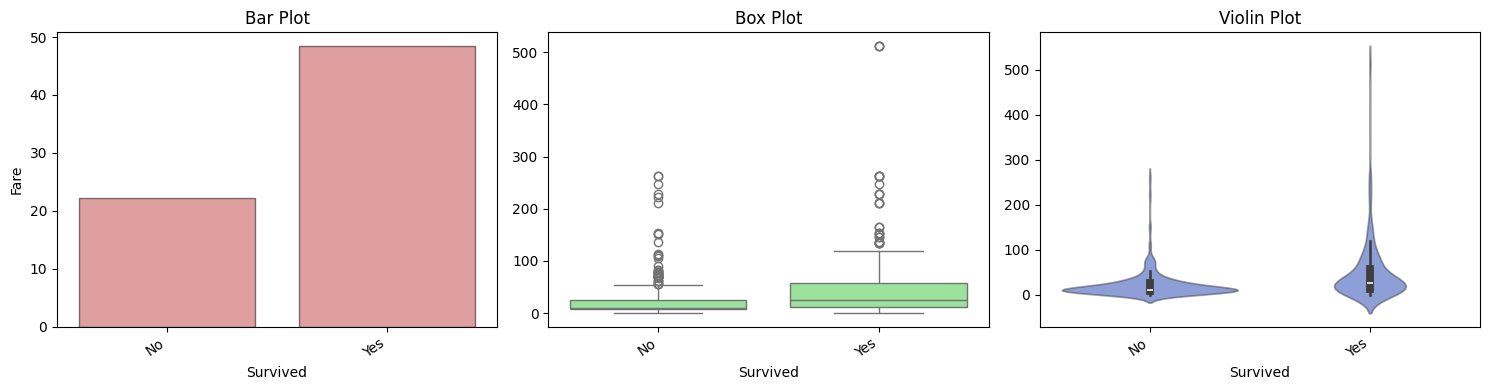

In [231]:
eda_helper_functions.num_cat_bivar_plots(train, 'Fare', 'Survived')

### Observations (Fare vs Survived)
- Survivors have noticeably higher mean Fare.
- Distributional spread is wide with heavy right tail; medians closer than means.


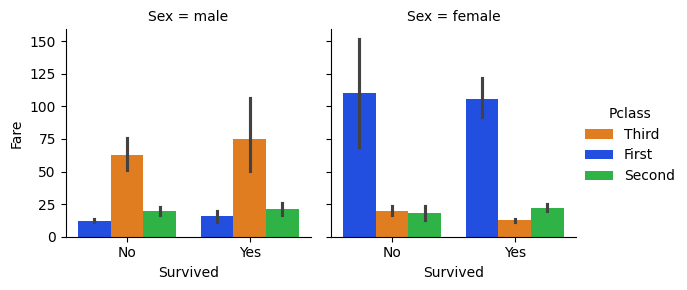

In [42]:
fare_grid = sns.FacetGrid(
    data=train,
    col='Sex'
)
fare_grid.map_dataframe(sns.barplot, x='Survived', y='Fare', hue='Pclass', palette='bright')
fare_grid.add_legend(title='Pclass')

### Observations (Fare × Survived by Sex with Pclass hue)
- Survivors pay higher fares on average in both sexes.
- First-class dominates higher fares and survival; Third-class shows lowest fares and survival.


### `Cabin`

In [239]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
train.Cabin.isna().sum()

np.int64(687)

In [19]:
train = (
    train
    .assign(
        Cabin=lambda df_: np.where(
            df_.Cabin.isna(),
            'unknown',
            'known'
        )
    )
)

In [22]:
train.Cabin.value_counts()

Cabin
unknown    687
known      204
Name: count, dtype: int64

In [23]:
eda_helper_functions.cat_summary(train, 'Cabin')

0      unknown
1        known
2      unknown
3        known
4      unknown
        ...   
886    unknown
887      known
888    unknown
889      known
890    unknown
Name: Cabin, Length: 891, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 891 / 891 rows


,
count,891
unique,2
top,unknown
freq,687


,count,percentage
category,,
unknown,687,0.771044
known,204,0.228956


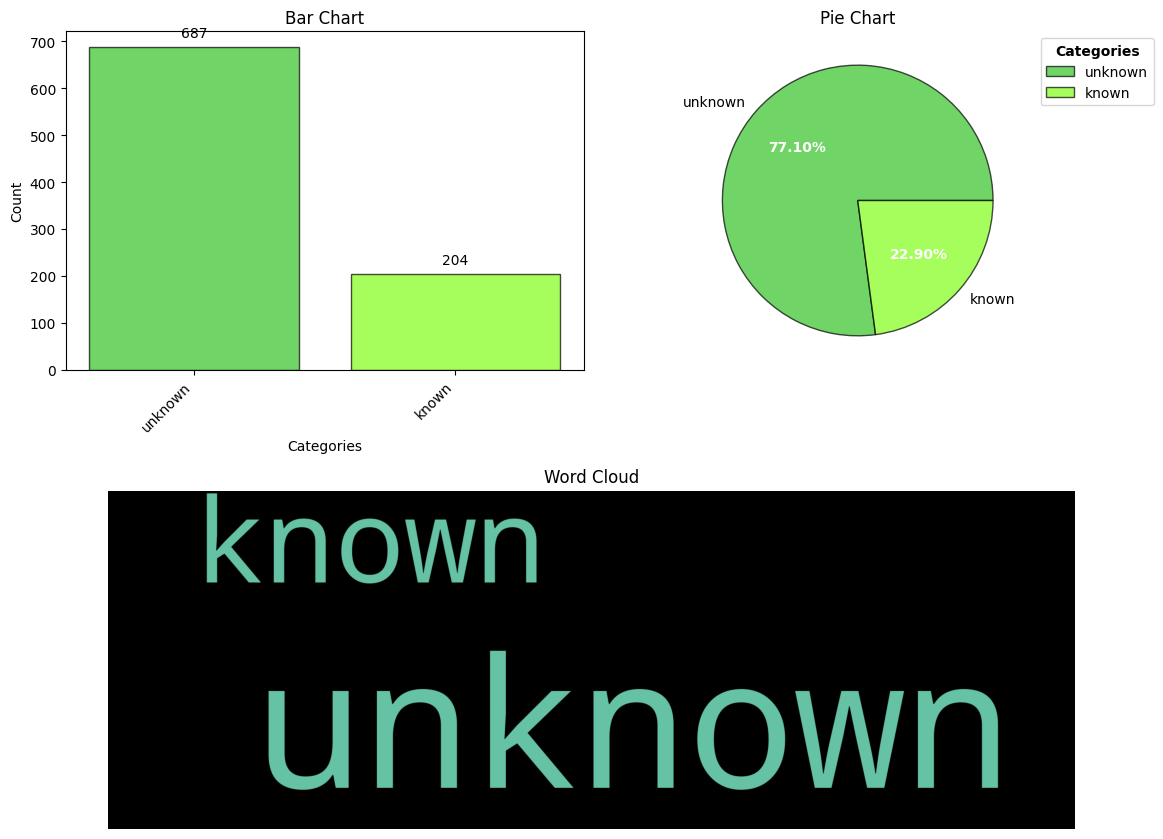

In [24]:
eda_helper_functions.cat_univar_plots(train, 'Cabin')

### Observations (Cabin univariate)
- Majority of entries are `unknown`; very few `known` cabins.
- The heavy missingness motivated binarizing Cabin to known/unknown.


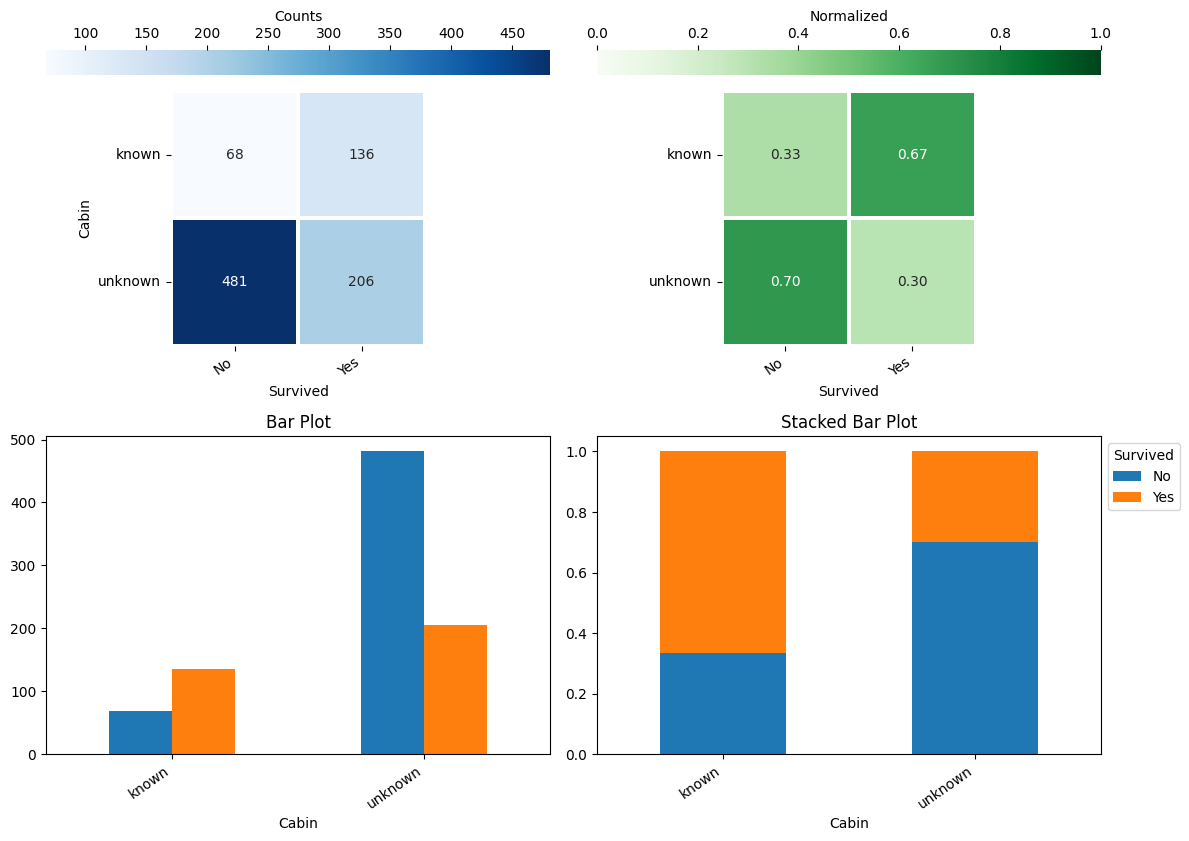

In [25]:
eda_helper_functions.cat_bivar_plots(train, 'Cabin', 'Survived')

### Observations (Cabin vs Survived)
- Passengers with known cabins have higher survival.
- Cabin-known is a proxy for higher Pclass and better accommodation.


### `Embarked`

In [26]:
train.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [27]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
train.Embarked.isna().sum()

np.int64(2)

In [29]:
eda_helper_functions.cat_summary(train, 'Embarked')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 2 rows (0.22 %)
Available Data : 889 / 891 rows


,
count,889
unique,3
top,S
freq,644


,count,percentage
category,,
S,644,0.724409
C,168,0.188976
Q,77,0.086614


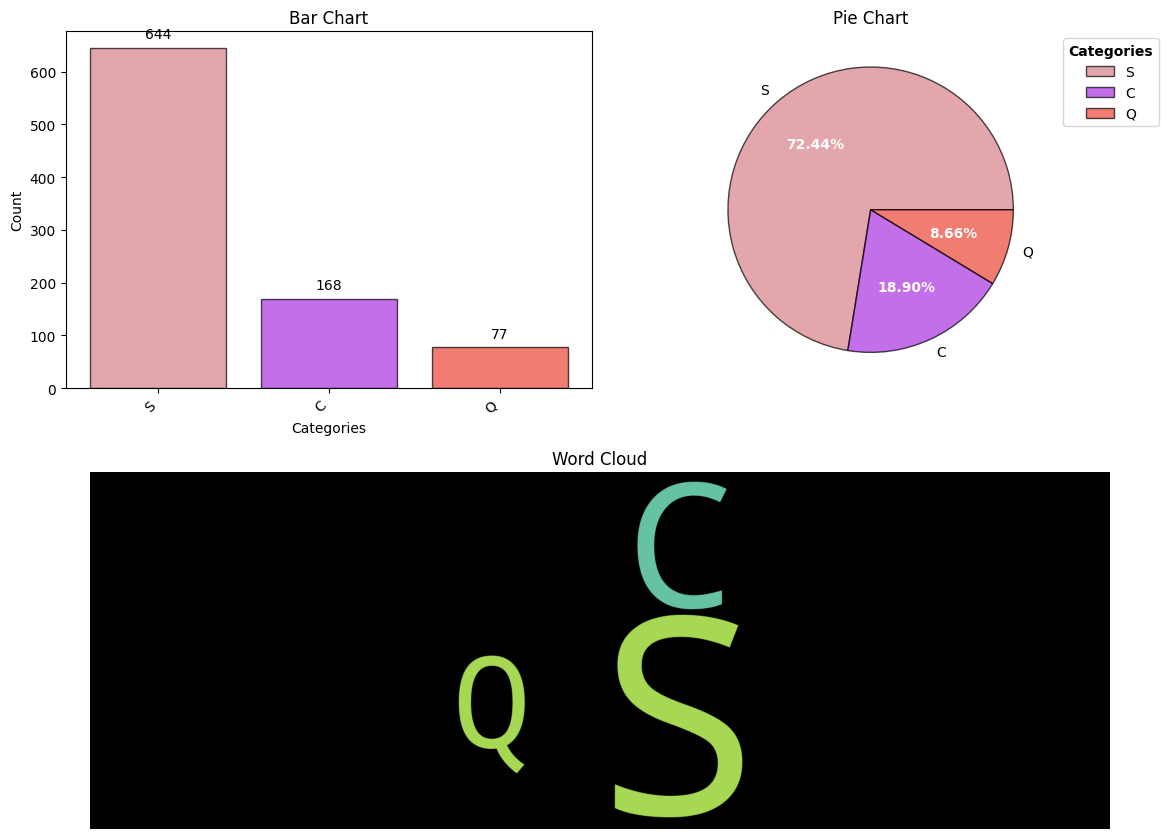

In [30]:
eda_helper_functions.cat_univar_plots(train, 'Embarked')

### Observations (Embarked univariate)
- Most passengers embarked at S, followed by C, then Q.
- Class/sex composition differs by port (seen in later facets).


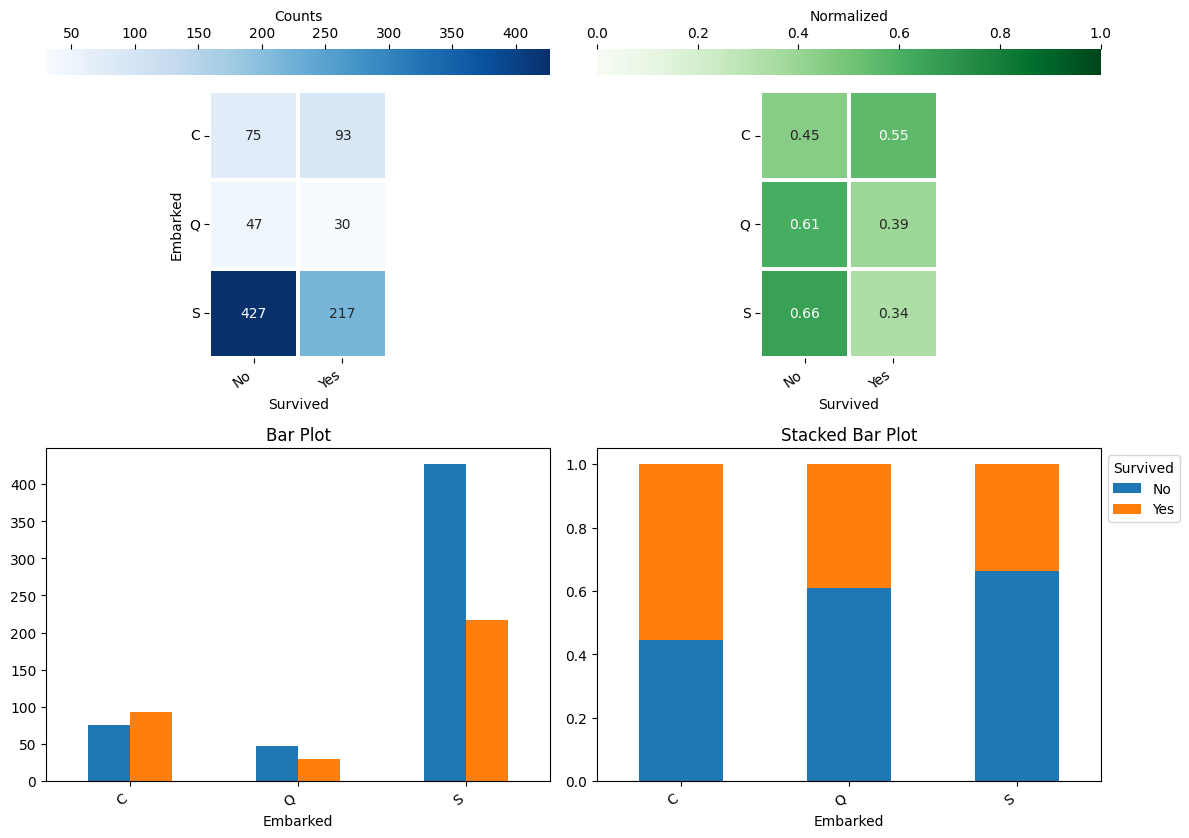

In [32]:
eda_helper_functions.cat_bivar_plots(train, 'Embarked', 'Survived')

### Observations (Embarked vs Survived)
- Higher survival for C; S lower; Q intermediate.
- Differences align with varying Pclass/Sex mix by port; effect weaker than Sex/Pclass.


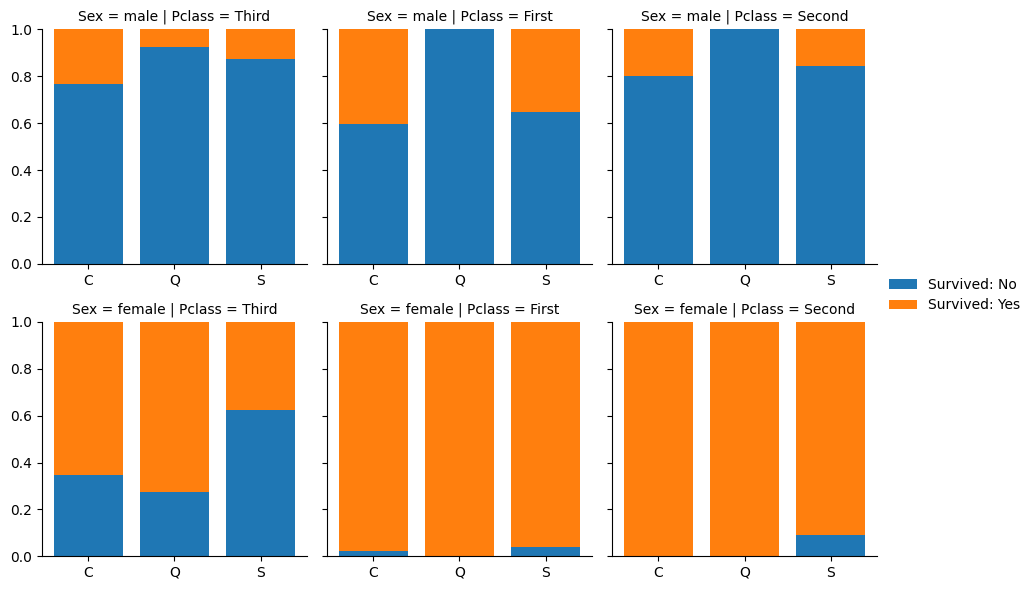

In [38]:
pclass_grid = sns.FacetGrid(
    data=train,
    col='Pclass',
    row='Sex',
    sharex=False
)
pclass_grid.map_dataframe(stacked_bar, category='Embarked')
pclass_grid.add_legend()

### Observations (Embarked × Pclass × Sex stacked bars)
- Within each Pclass×Sex, C shows a higher survival share; S is lower; Q is in-between.
- Highest survival among First-class females from C; Third-class males from S show the lowest survival.
